In [1]:
from virusPropagationModel import *
import VPM_plotting as vpm_plot
%matplotlib inline
%load_ext autoreload
import glob
import os
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib.cm as cm
#%load_ext memory_profiler


In [2]:
geopath = 'datafiles/'
geofiles = {0:'Buildings_Bad_Feilnbach_MA_0_5.csv',
            1:'Buildings_Bad_Feilnbach_MA_1.csv',
            2:'Buildings_Bad_Feilnbach_MA_3.csv',
            3:'Buildings_Gangelt_MA_0_5.csv',
            4:'Buildings_Gangelt_MA_1.csv',
            5:'Buildings_Gangelt_MA_3.csv',
            6:'Buildings_Bockhorn_MA_0_5.csv',            #not working for me actually 8892, 7days incidence = 34.74 2.11.2020
            7:'Buildings_Hessisch_Lichtenau_MA_0_5.csv',  #agents: 7383 actually 12431, 7days incidence = 46.7 3.11.2020
            8:'Buildings_Oranienbaum-Wörlitz_MA_0_5.csv', #agents: 7665 actually 8242 , 7days incidence = 52.0 3.11.2020
            9:'Buildings_Linsengericht_MA_0_5.csv',       #agents: 9569 actually 9882, 7days incidence = 149.0 2.11.2020 many worker related buildings i think farms
            10:'Buildings_Simbach_a.Inn_MA_0_5.csv',      #agents: 9461 actually 9954, 7days incidence = 287.2 2.11.2020
           }         

###### initialize small Gangelt

In [3]:
pick = 3

In [ ]:
#%reload_ext autoreload not working with pickel 

In [4]:
modeledWorld1 = ModeledPopulatedWorld(1000,5, world_from_file=True, geofile_name=geopath+geofiles[pick], agent_agent_infection=True, input_schedules='schedules_v2')
n_people = modeledWorld1.number_of_people
print('Number of agents: '+ str(n_people))

Number of agents: 7261


In [5]:
modeledWorld1.save(geofiles[pick].split('_')[1])

###### initialize large Gangelt

In [ ]:
modeledWorld2 = ModeledPopulatedWorld(1000,5, world_from_file=True, geofile_name=geopath+geofiles[8], agent_agent_infection=True, input_schedules='schedules_v2')
n_people = modeledWorld2.number_of_people
print('Number of agents: '+ str(n_people))


### Modeled World 

##### Information Dataframes for agents and locations

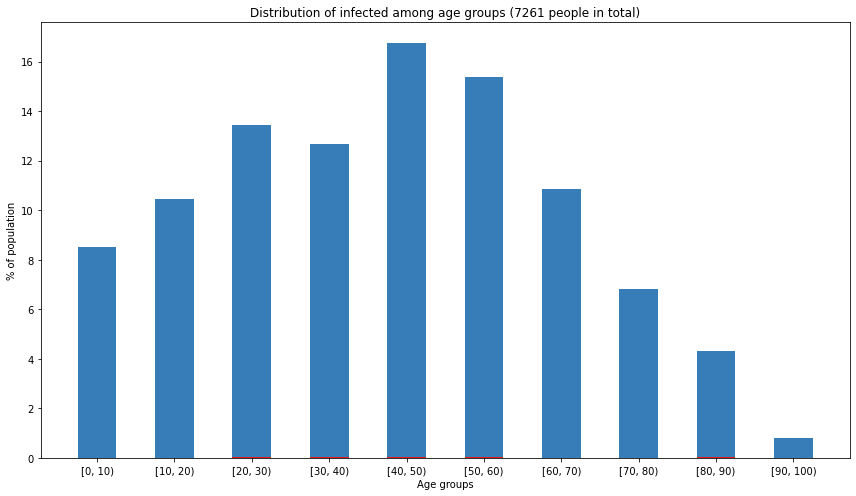

In [5]:
modeledWorld1.plot_initial_distribution_of_ages_and_infected(age_groups_step=10)

In [6]:
df_loc = modeledWorld1.get_agent_info()
df_loc.head(4)

AttributeError: 'ModeledPopulatedWorld' object has no attribute 'get_agent_info'

In [ ]:
df_ag = modeledWorld1.get_location_info()
df_ag.head(4)

In [7]:
modeledWorld1.get_distribution_of_location_types()

,hospital,morgue,mixing_loc,work,public,school,home
0,6,1,1,23,39,10,3500


In [ ]:
modeledWorld2.get_distribution_of_schedule_types(relative=True)

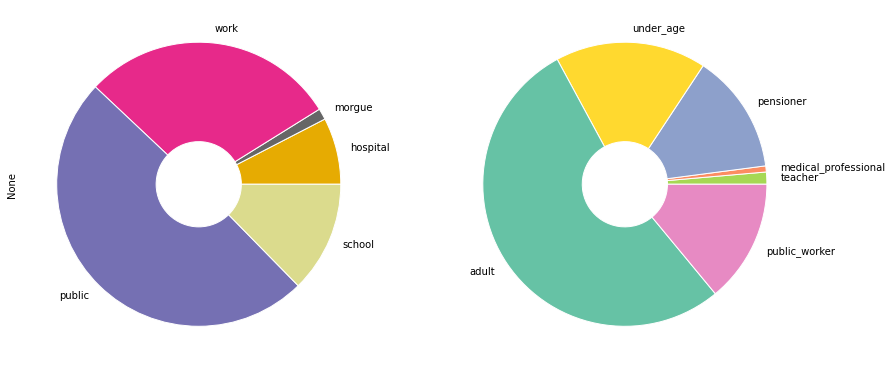

In [8]:
modeledWorld1.plot_locations_and_schedules(locs_to_hide=['home','mixing_loc'])

### simulations
add description and instructions

In [9]:
simulation_inf_ini = Simulation(modeledWorld1,400,run_immediately=False)
simulation_inf_ini.change_agent_attributes({'all':{'behaviour_as_infected':{'value':0.3,'type':'replacement'}}})
simulation_inf_ini.interaction_frequency=2
%prun -s cumtime simulation_inf_ini.simulate()
simulation2 = Simulation(simulation_inf_ini,100)

RecursionError: maximum recursion depth exceeded while calling a Python object

In [ ]:
simulation2 = Simulation(modeledWorld1,400,run_immediately=False)
simulation2.change_agent_attributes({'all':{'behaviour_as_infected':{'value':0.3,'type':'replacement'}}})
simulation2.interaction_frequency=2
simulation2.simulate()
simulation2.plot_infections_per_schedule_type_delta(modeledWorld1,relative=False, label_offset=0.04, title='all infections')
simulation2.plot_infections_per_schedule_type_delta(modeledWorld1,relative=False, fraction_most_infectious=0.1, title='10% most infectious', label_offset=0.02)
simulation2.plot_infections_per_location_type_delta(modeledWorld1,relative=False, label_offset=0.04)

##### homogenous mixing

In [ ]:
simulation3=Simulation(modeledWorld1,500,run_immediately=False)
simulation3.change_agent_attributes({'all':{'behaviour_as_infected':{'value':0.3,'type':'replacement'}}})
simulation3.interaction_frequency=2
simulation3.set_homogeneous_mixing()
simulation3.simulate()
simulation3.plot_infections_per_schedule_type_delta(modeledWorld1,relative=False, label_offset=0.04, title='all infections')
simulation3.plot_infections_per_schedule_type_delta(modeledWorld1,relative=False, fraction_most_infectious=0.1, title='10% most infectious', label_offset=0.02)
simulation3.plot_infections_per_location_type_delta(modeledWorld1,relative=False, label_offset=0.04)

In [ ]:
simulation3.plot_status_at_location()

#####  contact informations 

In [ ]:
df1, df2 = simulation2.get_contact_distributions(max_t=168)

In [ ]:
df1.head(4)

In [ ]:
df2.head(4)

###### infection informations

In [ ]:
simulation2.plot_infections_per_location_type_over_time()

In [ ]:
simulation2.plot_location_type_occupancy_timecourse(specific_types=['public'])

In [ ]:
simulation2.plot_location_type_occupancy_timecourse(specific_types=['work'])

In [ ]:
contact_df = simulation2.get_contact_distributions()

### equal interaction frequency

In [ ]:
simulation1 = Simulation(modeledWorld1,1000,run_immediately=False)
simulation1.change_agent_attributes({'all':{'behaviour_as_infected':{'value':0.3,'type':'replacement'}}})
simulation1.interaction_frequency=2
simulation1.simulate()

In [ ]:
print('mean IF: '+ str(sum([p.interaction_modifier for p in simulation1.people])/n_people))
simulation1.plot_status_timecourse()

In [ ]:
simulation1.plot_infections_per_location_type_delta(modeledWorld1)
simulation1.plot_infections_per_schedule_type_delta(modeledWorld1)

In [ ]:
IF = 2 

#def set_IM(IM, Id_list):
#    n_1 = [p.IF=1 for p in modeledWorld1.people if p in Id_list]
    

### increased  interaction frequency for young agents

In [ ]:
im = 1.5 # set interaction_modifier of agents to im 
min_age = -1
max_age = 26
p_subset_ids = [p.ID for p in world.people if (p.age > min_age) & (p.age < max_age)]
modeledworld1.set_im_for_subset(im, id_list=p_subset_ids, keep_average=True)


test adjustment of interaction_modifier

In [ ]:
agent_info_df = modeledWorld1.get_agent_info()
agent_info_df.groupby('Interaction Modifier').count()

In [ ]:
age = 25
n_people = modeledWorld1.number_of_people
#kids = [p.ID for p in modeledWorld1.people if p.age<25]
#n_kids = len(kids)
rest = [p.ID for p in modeledWorld1.people if p.age>20]
n_rest = (len(rest))
if_rest = (1 - IF)*n_people/n_rest+IF #(1*n_people - if_kids*(n_people-n_rest))/*n_rest =
simulation2 = Simulation(modeledWorld1, 500, run_immediately=False)
simulation2.change_agent_attributes({'all':{'behaviour_as_infected':{'value':0.3,'type':'replacement'}}}) 
[setattr(p, 'interaction_modifier', IF ) for p in simulation2.people if p.age<age+1]
[setattr(p, 'interaction_modifier', if_rest ) for p in simulation2.people if p.age>age]
simulation2.interaction_frequency = 2
simulation2.simulate()

In [ ]:
str(sum([p.interaction_modifier for p in simulation2.people])/n_people)

In [ ]:
print('mean IF: '+ str(sum([p.interaction_modifier for p in simulation2.people])/n_people))
print('IF: ' + str(IF))
print('IF_REST: ' + str(if_rest))
print('ratio of people with increased IF:'+str(1-n_rest/n_people))
simulation2.plot_status_timecourse()

In [ ]:
simulation2.plot_infections_per_location_type_delta(modeledWorld1)
simulation2.plot_infections_per_schedule_type_delta(modeledWorld1)

### decreased  interaction frequency for older agents 

In [ ]:
IF=0.5
age = 65
n_people = modeledWorld1.number_of_people
rest = [p.ID for p in modeledWorld1.people if p.age<age+1]
n_rest = (len(rest))
if_rest = (1 - IF)*n_people/n_rest+IF #(1*n_people - if_kids*(n_people-n_rest))/*n_rest =
simulation3 = Simulation(modeledWorld1,1000,run_immediately=False)
simulation3.change_agent_attributes({'all':{'behaviour_as_infected':{'value':0.3,'type':'replacement'}}}) 
[setattr(p, 'interaction_modifier', IF ) for p in simulation3.people if p.age>age]
[setattr(p, 'interaction_modifier', if_rest ) for p in simulation3.people if p.age<age+1]
simulation3.interaction_frequency = 2
simulation3.simulate()

In [ ]:
print('mean IF: '+ str(sum([p.interaction_modifier for p in simulation3.people])/n_people))
print('IF: ' + str(IF))
print('IF_REST: ' + str(if_rest))
print('ratio of people with increased IF:'+str(1-n_rest/n_people))
simulation3.plot_status_timecourse()

In [ ]:
#simulation3.plot_infections_per_location_type(relative_to_building_number=False)
simulation3.plot_infections_per_location_type_delta(modeledWorld1)
simulation3.plot_infections_per_schedule_type_delta(modeledWorld1)

#### combined 

In [ ]:
fig,axes =plt.subplots(3,2, figsize=(8,10), sharex=True,)  #sharey=True)

simulation1.plot_infections_per_location_type_delta(modeledWorld1, ax=axes[0][0], title='equal IF')
simulation1.plot_infections_per_schedule_type_delta(modeledWorld1, ax=axes[0][1], title='equal IF')

simulation2.plot_infections_per_location_type_delta(modeledWorld1, ax=axes[1][0], title='IF3 age <25')
simulation2.plot_infections_per_schedule_type_delta(modeledWorld1, ax=axes[1][1], title='IF3 age <25')

simulation3.plot_infections_per_location_type_delta(modeledWorld1, ax=axes[2][0], title='IF0.5 age >65')
simulation3.plot_infections_per_schedule_type_delta(modeledWorld1, ax=axes[2][1], title='IF0.5 age >65')
plt.tight_layout()

In [ ]:
def set_im_for_subset(world, im, id_list, keep_average=True): 
    
    [setattr(p, 'interaction_modifier', im ) for p in world.people if p.ID in id_list]
    
    if keep_average:
        n_people = modeledWorld1.number_of_people
        rest = [p.ID for p in modeledWorld1.people if p.ID not in id_list]
        n_rest = len(rest)
        im_rest = (1 - im)*n_people/n_rest+im
        [setattr(p, 'interaction_modifier', im_rest ) for p in world.people if p.ID not in id_list]
        
def get_ids_in_agerange(world, age(()):
                        pass
    
    

    

In [ ]:


mw = copy.deepcopy(modeledWorld1)
l = np.arange(0,300,1)
set_im_for_subset(mw, 2, l, keep_average=True) 

agent_info_list  = [{'ID':p.ID ,
                     'Age':p.age ,
                     'Home': p.home.ID,
                     'Type':p.type,
                     'Interaction Modifier': p.interaction_modifier}
                    for p in mw.people]
agent_info_df = pd.DataFrame(agent_info_list)
agent_info_df.groupby('Interaction Modifier').count()



### intercation frequence human dependent

In [ ]:
time=125
df_red= df_c[df_c['time']>time]
df_all= df_red.groupby('infected_by_ID').count()
df_all.sort_values(by='h_ID')/20#/len(df_list)


In [ ]:
group_list = [x[x['time']>100].groupby('infected_by_ID').count().sort_values('h_ID') for x in df_list]

In [ ]:
type_ratio_inf_dict.values()

In [ ]:
modeledWorld1.

In [ ]:
cmap = plt.get_cmap("Set3")
colors = cmap(np.arange(1,len(type_ratio_inf_dict.values())+3))

plt.pie(type_ratio_inf_dict.values(),labels=type_ratio_inf_dict.keys(), radius=1, colors=colors,
       wedgeprops=dict(width=1, edgecolor='w'))
plt.savefig('plots/agents_types.png',bbox_inches='tight')

In [ ]:
fig, axes =plt.subplots(1,2,figsize=(8,4))
ax1 = axes[0]
ax2 = axes[1]
ax1.set_ylim(0,0.6), ax2.set_ylim(0,0.6)

##world
types = set([p.type for p in world.people])
n_people =  len(world.people)
type_ratio_dict = {t: sum([1 for p in world.people if p.type==t])/n_people for t in types}
df1 = pd.DataFrame([type_ratio_dict])
df_m = df1.mean()
df_m.columns=['']
df_m.plot(kind='bar', ax=ax1)
df_m.plot(kind='bar', ax=ax2)
#axes[0].bar(range(len(type_ratio_dict)),type_ratio_dict.values())
#axes[0].set_xticklabels(['']+list(type_ratio_dict.keys()), rotation=20)

### most infected [1,2,3,4,]
nr_most_inf_p = 100
type_ratio_inf_list = []
for df in group_list:
    type_list_inf = [p.type for p in world.people if p.ID in df[:nr_most_inf_p].index.values]
    type_ratio_inf_list.append({t: len([1 for x in type_list_inf if x==t])/nr_most_inf_p for t in types})
df = pd.DataFrame(type_ratio_inf_list)    
df.mean().plot(kind='bar', ax=ax1,color='r',alpha=0.5, title='most infectious agents')
ax.set_ylabel('fraction')
#axes[1].bar(range(len(type_ratio_inf_dict)),type_ratio_inf_dict.values())
#axes[1].set_xticklabels(['']+list(type_ratio_inf_dict.keys()), rotation=20)
plt.savefig('plots/most_infectious_agents.png',bbox_inches='tight')

### most infected random
nr_most_inf_p = 100
type_ratio_inf_list = []
for df in group_list:
    type_list_inf = [p.type for p in world.people if p.ID in df[:nr_most_inf_p].index.values]
    type_ratio_inf_list.append({t: len([1 for x in type_list_inf if x==t])/nr_most_inf_p for t in types})
df = pd.DataFrame(type_ratio_inf_list)    
df.mean().plot(kind='bar', ax=ax1,color='r',alpha=0.5, title='most infectious agents')
ax.set_ylabel('fraction')
#axes[1].bar(range(len(type_ratio_inf_dict)),type_ratio_inf_dict.values())
#axes[1].set_xticklabels(['']+list(type_ratio_inf_dict.keys()), rotation=20)
plt.savefig('plots/most_infectious_agents.png',bbox_inches='tight')

In [ ]:
#plt.bar(range(len(type_ratio_dict)),type_ratio_dict.values())
sns.pie(data=df)
#plt.xticks(range(len(type_ratio_dict.keys())),list(type_ratio_dict.keys()), rotation=20)

In [ ]:
#for df in group_list:
# 
i=10
group_list[0][-i:]
#worldsV2Gangelt_MA_3_3_worldObj.pkl
types = set([p.type for p in world.people])
most_infectious_p = list(np.arange(6,120,4))
cs=['r','b','k','g','r','b','k']

for k,df in enumerate(group_list[1]):
    l = []
    for i in most_infectious_p:
        l.append([p.type for p in world.people if p.ID in df[-i:].index.values])

    l_dict = {}
    for t in types:
        l_dict[t]=[x.count(t) for x in l]

    
    for i,t in enumerate(l_dict):
        plt.plot(most_infectious_p,np.array(l_dict[t])/most_infectious_p, label=t, c=cs[i],alpha=0.2)

for t in types:
    plt.plot(most_infectious_p,np.array(l_dict[t])/most_infectious_p, label=t, c=cs[i],alpha=0.2)

In [ ]:
fs= os.listdir(folder)
df_list = [pd.read_csv(folder+f) for f in fs if 'information' in f]
df_c =pd.concat(df_list, ignore_index=True, sort=True)

df_new = df_c[df_c['time']>200].groupby('infected_by_ID').count()
df_all = df_new.sort_values(by='h_ID')#/len(df_list)
df_all

In [ ]:
w_list = os.listdir('saved_objects/worldsV2/')
world = load_simulation_object('worldsV2Gangelt_MA_3_3_worldObj.pkl', folder='saved_objects/worldsV2/')
n_p = len(world.people)
print(n_p)

In [ ]:
#worldsV2Gangelt_MA_3_3_worldObj.pkl
types = set([p.type for p in world.people])
most_infectious_p = list(np.arange(6,120,4))
l = []
for i in most_infectious_p:
    l.append([p.type for p in world.people if p.ID in df_all[-i:].index.values])

    

In [ ]:
l_dict = {}
for t in types:
    l_dict[t]=[x.count(t) for x in l]

In [ ]:
cs=['r','b','k','g','r','b','k']
for i,t in enumerate(l_dict):
    plt.plot(most_infectious_p,np.array(l_dict[t])/most_infectious_p, label=t, c=cs[i])
    #plt.plot(most_infectious_p, [sum([1 for p in world.people if p.type==t])/n_p]*len(most_infectious_p),'--',color=cs[i])
    
plt.legend(loc=(1.1,0.5))
plt.xlabel('most infectious people')
plt.ylabel('fraction of type')

In [ ]:
import networkx as nx
G = nx.Graph()
for i in range(len(df_all)):
    a=df.iloc[i]['h_ID']
    b=df.iloc[i]['infected_by_ID']
    G.add_edge(a, b)
#G.add_edge('B', 'D', weight=2)
#G.add_edge('A', 'C', weight=3)
#G.add_edge('C', 'D', weight=4)
#nx.shortest_path(G, 'A', 'D', weight='weight')
#['A', 'B', 'D']

In [ ]:
nx.to_edgelist(G)

In [ ]:
nx.draw(G, font_weight='bold', size=1, pos=nx.spring_layout(G))

### Rest

In [ ]:
normal = [p.interaction_modifier for p in simulation1.people]
kids = [p.interaction_modifier for p in simulation2.people]
old = [p.interaction_modifier for p in simulation3.people]
print('normal:'+str(sum(normal))+'  kids:'+str(sum(kids))+'  old:'+str(sum(old)))

In [ ]:
simulation1.map_status_at_loc()

In [ ]:
simulation1.plot_status_at_location()

In [ ]:
mu_list=np.arange(1,79,20)
mu_dict={}
mu_list

In [ ]:
simulation1 = Simulation(modeledWorld1,800,run_immediately=False)
simulation1.change_agent_attributes({'all':{'behaviour_as_infected':{'value':0.3,'type':'replacement'}}})
simulation1.interaction_frequency=5
simulation1.simulate()

for p in list(simulation1.people):
    p.stay_home_instead_of_going_to('work')
    p.stay_home_instead_of_going_to('school')
    p.stay_home_instead_of_going_to('public')

simulation1.time_steps=500
simulation1.simulate()

for p in list(simulation1.people):
    p.reset_schedule()

simulation1.time_steps=1000
simulation1.simulate()
simulation1.plot_status_timecourse()
df= simulation1.simulation_timecourse
### interactions
ips=list(df['Interaction_partner'].values)
connections =[len(step.split(',')) for step in ips if step !='']
plt.hist(connections,bins=20)

In [ ]:
###plot ratio
secondary_infs.sort(reverse=True)
sum_inf = [sum(secondary_infs[0:x]) for x in range(len(secondary_infs))]
plt.plot(np.array(list(range(len(secondary_infs))))/max(sum_inf),np.array(sum_inf)/max(sum_inf))
plt.plot(np.array(list(range(len(secondary_infs))))/max(sum_inf),[0.7]*len(sum_inf), label='70%')
plt.ylabel('fraction of secondary infections')
plt.xlabel('')
plt.legend()


In [ ]:
for dict_,k in enumerate([mu_dict, mu_dict_05]):
    for mu in dict_:
        df_1=mu_dict[mu]
        df=df_1#df_1[df_1['time']<700]
        infections = df[df['Infection_event']>0]
        spreader = list(infections['Infection_event'].values)
        spreader_ids=list(set(spreader))
        secondary_infs=[spreader.count(x) for x in spreader_ids]
        print(np.array(secondary_infs).mean())
        print(np.array(secondary_infs).max())
        #plt.figure(mu)
        #plt.hist(secondary_infs, color='r')

        ips=list(df['Interaction_partner'].values)
        connections =[len(step.split(',')) for step in ips if step !='']
        #plt.figure(mu+1)
        #plt.hist(connections,bins=20)
        #plt.title('mu: '+str(mu))

        ###plot ratio
        plt.figure(k)
        secondary_infs.sort(reverse=True)
        sum_inf = [sum(secondary_infs[0:x]) for x in range(len(secondary_infs))]
        plt.plot(np.array(list(range(len(secondary_infs))))/max(sum_inf),np.array(sum_inf)/max(sum_inf), label=mu)

        plt.ylabel('fraction of secondary infections')
        plt.xlabel('')
        plt.legend()
    plt.figure(3)    
    plt.plot(np.array(list(range(len(secondary_infs))))/max(sum_inf),[0.7]*len(sum_inf), label='70%')    
    plt.plot(np.array(list(range(len(secondary_infs))))/max(sum_inf),[0.5]*len(sum_inf), label='50%') 

mu_dict_05

In [ ]:
simulation1 = Simulation(modeledWorld1,800,run_immediately=False)
simulation1.change_agent_attributes({'all':{'behaviour_as_infected':{'value':0.3,'type':'replacement'}}})
simulation1.interaction_matrix=False
simulation1.simulate()

for p in list(simulation1.people):
    p.stay_home_instead_of_going_to('work')
    p.stay_home_instead_of_going_to('school')
    p.stay_home_instead_of_going_to('public')

simulation1.time_steps=500
simulation1.simulate()

for p in list(simulation1.people):
    p.reset_schedule()

simulation1.time_steps=1000
simulation1.simulate()
simulation1.plot_status_timecourse()

### interactions
df= simulation1.simulation_timecourse
ips=list(df['Interaction_partner'].values)
connections =[len(step.split(',')) for step in ips if step !='']
plt.hist(connections, bins=20)

In [ ]:
simulation1 = Simulation(modeledWorld1,200,run_immediately=False)
simulation1.simulate()
simulation1.plot_status_timecourse()

In [ ]:
simulation2 = Simulation(modeledWorld1,1500,run_immediately=False)
simulation2.change_agent_attributes({'all':{'behaviour_as_infected':{'value':0.3,'type':'replacement'}}})
simulation2.interaction_matrix=False

In [ ]:
simulation2.simulate()
simulation2.plot_status_timecourse()

In [ ]:
simulation1.save('Bad_Feilnbach_SIM', date_suffix=False )

In [ ]:
simulation1.plot_interaction_timecourse(save_figure=False, log=True, diagnosed_contact=False)
simulation1.plot_interaction_timecourse(save_figure=False, log=True, diagnosed_contact=True)

In [ ]:
simulation1.plot_status_timecourse(specific_people='medical_professional')

In [ ]:
simulation1.plot_flags_timecourse()

In [ ]:
simulation2.plot_status_at_location()

In [ ]:
simulation1.map_status_at_loc(save_figure=False,time_steps=1)

In [ ]:
simulation1.plot_status_timecourse(specific_people='teacher')

In [ ]:
simulation1.plot_age_groups_status_timecourse()